In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from pathlib import Path
data_path_single_line =Path(r"/content/drive/MyDrive/Sinhala_writing_error_detection/multi/train")

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path_single_line,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1383 files belonging to 2 classes.
Using 1107 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path_single_line,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1383 files belonging to 2 classes.
Using 276 files for validation.


In [ ]:
vg16_model = Sequential()

In [ ]:
pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling="avg",
    classes=2
)


# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(180,180,3),
#                    pooling='avg',classes=2,
#                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vg16_model.add(pretrained_model)
vg16_model.add(Flatten())
vg16_model.add(Dense(512, activation='relu'))
vg16_model.add(Dense(2, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrapp  (None, 512)              0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              262656    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
______________________________________

In [ ]:
vg16_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = vg16_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
35/35 [==============================] - 98s 2s/step - loss: 0.3935 - accuracy: 0.8672 - val_loss: 0.1537 - val_accuracy: 0.9493
Epoch 2/10
35/35 [==============================] - 13s 308ms/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.0509 - val_accuracy: 0.9855
Epoch 3/10
35/35 [==============================] - 13s 307ms/step - loss: 0.0337 - accuracy: 0.9901 - val_loss: 0.0485 - val_accuracy: 0.9855
Epoch 4/10
35/35 [==============================] - 13s 306ms/step - loss: 0.0193 - accuracy: 0.9973 - val_loss: 0.0350 - val_accuracy: 0.9819
Epoch 5/10
35/35 [==============================] - 13s 310ms/step - loss: 0.0141 - accuracy: 0.9982 - val_loss: 0.0288 - val_accuracy: 0.9891
Epoch 6/10
35/35 [==============================] - 13s 310ms/step - loss: 0.0108 - accuracy: 0.9982 - val_loss: 0.0287 - val_accuracy: 0.9891
Epoch 7/10
35/35 [==============================] - 13s 310ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.0252 - val_accuracy: 0.9855
Ep

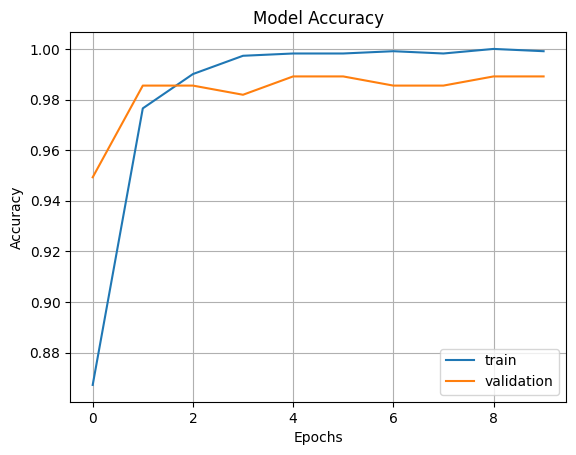

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

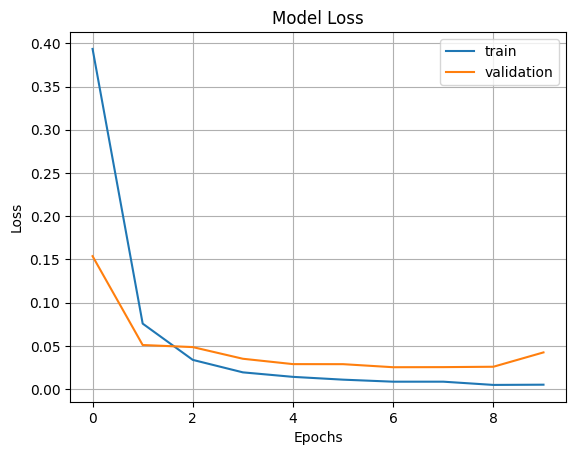

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
vg16_model.save_weights("/content/drive/MyDrive/Sinhala_writing_error_detection/multi/single_line_model_epochs_10.h5")

In [3]:
trianed_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling="avg",
    classes=2
)

for layer in pretrained_model.layers:
        layer.trainable=False

trianed_model.add(pretrained_model)
trianed_model.add(Flatten())
trianed_model.add(Dense(512, activation='relu'))
trianed_model.add(Dense(2, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
trianed_model.load_weights("/content/drive/MyDrive/Sinhala_writing_error_detection/multi/multi_line_model_epochs_10.h5")

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [6]:
import os
import random

folder_path_issue = "/content/drive/MyDrive/Sinhala_writing_error_detection/multi/val/issue"
folder_path_normal = "/content/drive/MyDrive/Sinhala_writing_error_detection/multi/val/normal"
num_images = 10

image_paths_issue = []
for root, dirs, files in os.walk(folder_path_issue):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths_issue.append(os.path.join(root, filename))

issue_images = random.sample(image_paths_issue, num_images)

image_paths_normal = []
for root, dirs, files in os.walk(folder_path_normal):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths_normal.append(os.path.join(root, filename))

normal_images = random.sample(image_paths_normal, num_images) 

In [7]:
import cv2


issue_predict = []
normal_predict =[]

issue_true = [1 for i in range(len(issue_images))]
normal_true = [0 for i in range(len(normal_images))]

y_true = issue_true + normal_true 


for ip in normal_images:
  image=cv2.imread(ip)
  img_height,img_width=224,224
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  pred=trianed_model.predict(image)
  class_names = [1, 0]
  output_class=class_names[np.argmax(pred)]
  normal_predict.append(output_class)

for ip in issue_images:
  image=cv2.imread(ip)
  img_height,img_width=224,224
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  pred=trianed_model.predict(image)
  class_names = [1, 0]
  output_class=class_names[np.argmax(pred)]
  issue_predict.append(output_class)

y_pred = issue_predict + normal_predict

print(y_pred , y_true)

1/1 [==============================] - 1s 1s/step
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


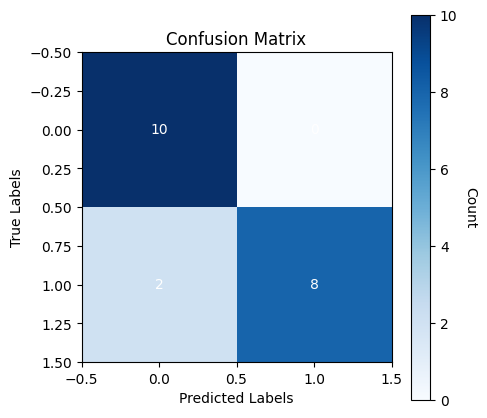

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Blues')

# Add title and axis labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add the count values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Add a colorbar legend
cbar = ax.figure.colorbar(ax.imshow(cm, cmap='Blues'), ax=ax)
cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")

# Show the plot
plt.show()